Content translated from: 
 http://courses.washington.edu/matlab1/Matlab4BS_c5.htm

In [3]:
import numpy as np


In [54]:
x = np.linspace(-np.pi, np.pi, 40) #which colored line
sf = 10  #spacial frequency 
sinewave = np.sin(x*sf)

In [55]:
onematrix = np.ones(len(sinewave))
sinewave2D = np.outer(onematrix, sinewave)

In [56]:
import matplotlib.pyplot as plt
import skimage
import skimage.io

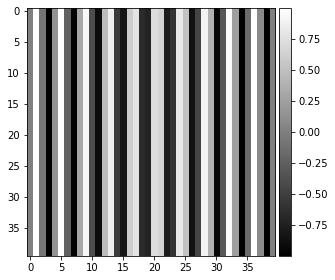

In [57]:
skimage.io.imshow(sinewave2D, cmap='gray')

sinewave2D varies between -1 and 1. On normal monitors, we can use up to 256 different colormap values, as is described in more detail in Section 3. So we want to rescale sinewave2D so it varies between 1-256, so the values in sinewave2D match the 256 rows in the colormap. We'll then use the image  command, which doesn't do any rescaling.

In [58]:
sinewave2D.shape

(40, 40)

In [63]:
scaled_sinewave2D = ((sinewave2D+1)*127.5)+1 #shifting  [-1 to 1 ] to [0 to 256] 

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


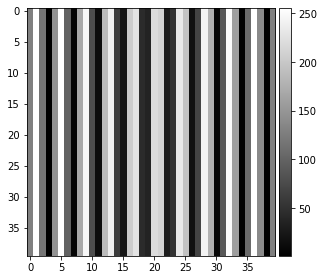

In [64]:
skimage.io.imshow(scaled_sinewave2D, cmap='gray')

### Playing with contrast 

In [51]:
#two ways 
#adjust gamma
#adjust log 

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


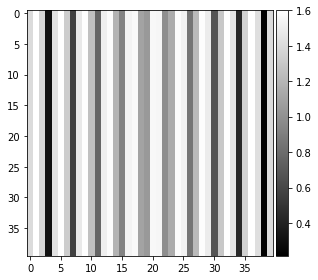

In [65]:
c_scaled_image = skimage.exposure.adjust_log(scaled_sinewave2D, 0.2)
skimage.io.imshow(c_scaled_image, cmap='gray')

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


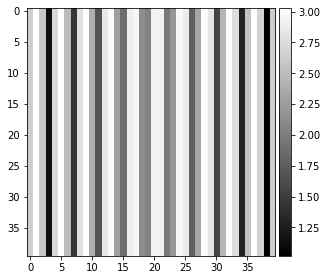

In [66]:
c_scaled_image = skimage.exposure.adjust_gamma(scaled_sinewave2D, 0.2)
skimage.io.imshow(c_scaled_image, cmap='gray')

Parameters that can vary:
size,
contrast,
spatial frequency,
orientation,
phase


In [103]:
X = np.array(np.meshgrid(np.linspace(-np.pi, np.pi, n)))
Y = X.T
X = np.vstack([X]*n)
Y= np.hstack([Y]*n)

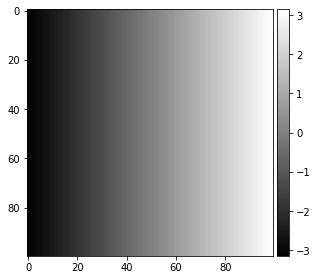

In [104]:
skimage.io.imshow(X, cmap='gray')

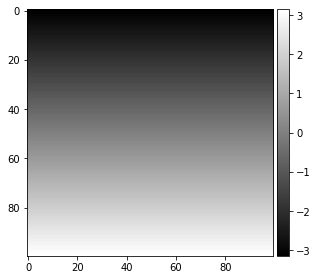

In [105]:
skimage.io.imshow(Y, cmap='gray')

Create an oriented 'ramp' matrix as a linear combination of X and Y. For

example, when orientation = 0, cos = 1 and sin = 0 so ramp = X.  When

orientation is pi/2 then cos = 0; sin = 1 and ramp = Y. 

 



float

In [106]:
ramp = np.cos(orientation)*(X-center[0]) + np.sin(orientation)*(Y-center[1])

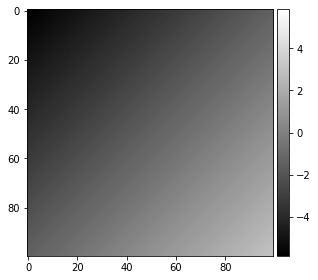

In [107]:
skimage.io.imshow(ramp, cmap = 'gray')

### Sinusoidal carrier is a sinusoid on the matrix 'ramp'

### sinusoid = contrast * sin(spatialFrequency * ramp-phase)

In [108]:

sinusoid = contrast*np.sin(sf*(ramp-phase))

In [116]:
#define each parameter here 

center = np.array([1,1])
orientation = np.pi/4  #45 deg
sf = 6 #spatial freq
phase = -np.pi/2 #spatial phase of sinewave carrier (Radians)
##contrast with gamma skimage
contrast = 0.75 #from 0 to 1


n = 100 #resolution of image 

##use meshgrid to define matrices X and Y that range from -pi to pi

def produce_image(center, orientation, sf, phase, contrast, n):

  X = np.array(np.meshgrid(np.linspace(-np.pi, np.pi, n)))
  Y = X.T
  X = np.vstack([X]*n)
  Y= np.hstack([Y]*n)

  c_scaled_image = skimage.exposure.adjust_gamma(scaled_sinewave2D, contrast)
  ramp = np.cos(orientation)*(X-center[0]) + np.sin(orientation)*(Y-center[1])
  sinusoid = contrast*np.sin(sf*(ramp-phase))
  img = skimage.io.imshow(sinusoid, cmap = 'gray')
  return img

In [139]:
arr = np.linspace(-np.pi/2, 0, 10)

Notice how the parameter center controls the asymmetry of ramp. When center is [1, 1] the values from the top right to bottom left of ramp (shown by a purple dotted line) are -1.4. The the values in ramp that are zero (shown by a pink dotted line) lie closer to the bottom right corner. These lines of constant value are oriented diagonally because we are making a diagonal sinusoid.